# Plots

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import os
import bokeh.palettes as palette
import scipy as sp
from scipy import stats
import random
import seaborn as sns

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

### Permutation Test

In [2]:
def permutation_test(corr_x, corr_y, rep):
    
    corr_list = []

    for i in range(rep):

        if i > 0:
            random.shuffle(corr_y)

        a = sp.stats.spearmanr(corr_x, corr_y, nan_policy='omit')
        corr_list.append(a[0])
        
    new_corr = []
    
    if corr_list[0] > 0:
        for i in range(1,len(corr_list)):
            if corr_list[i] >= corr_list[0]:
                new_corr.append(corr_list[i])
                
    if corr_list[0] < 0:
        for i in range(1,len(corr_list)):
            if corr_list[i] <= corr_list[0]:
                new_corr.append(corr_list[i])           
            
    return len(new_corr)/rep

### Names

In [3]:
# Nomi dei file (45)
network_names = ['CElegans-c_elegans_herm_pharynx_1_graphml.edges',
'CElegans-c_elegans_neural_male_1_graphml.edges',
'CionaIntestinalis-elife-16962-fig16-data1-v1_xlsx.edges',
'CionaIntestinalis-elife-16962-fig16-data2-v1_xlsx.edges',
'Drosophila-N1781-drosophila_medulla_1_graphml.edges',
'Drosophila-N388-connectivity_matrix_table_1_2_csv.edges',
'Drosophila-N49-adj_drosophila_txt.edges',
'Human_1215-sub-0027055_ses-1_dwi_DS01216_edges_txt.edges',
'Human_1215-sub-0027055_ses-1_dwi_Talairach_edges_txt.edges',
'Human_1215-sub-0027056_ses-1_dwi_DS01216_edges_txt.edges',
'Human_1215-sub-0027056_ses-1_dwi_Talairach_edges_txt.edges',
'Human_1215-sub-0027057_ses-1_dwi_DS01216_edges_txt.edges',
'Human_1215-sub-0027057_ses-1_dwi_Talairach_edges_txt.edges',
'Human_1215-sub-0027058_ses-1_dwi_DS01216_edges_txt.edges',
'Human_1215-sub-0027058_ses-1_dwi_Talairach_edges_txt.edges',
'Human_1215-sub-0027059_ses-1_dwi_DS01216_edges_txt.edges',
'Human_1215-sub-0027059_ses-1_dwi_Talairach_edges_txt.edges',
'Human_188-NKI_Rockland_8735778_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9006154_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9100911_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9421819_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9536886_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9537916_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9630905_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9645370_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9716792_DTI_connectmat_txt.edges',
'Human_188-NKI_Rockland_9780496_DTI_connectmat_txt.edges',
'Human_998-Hagmann_PLoSBiol_2008_subjA_connectmat_txt.edges',
'Human_998-Hagmann_PLoSBiol_2008_subjB_connectmat_txt.edges',
'Human_998-Hagmann_PLoSBiol_2008_subjC_connectmat_txt.edges',
'Human_998-Hagmann_PLoSBiol_2008_subjD_connectmat_txt.edges',
'Human_998-Hagmann_PLoSBiol_2008_subjE_connectmat_txt.edges',
'Mouse-kasthuri_graph_v4_graphml.edges',
'Mouse-mouse_brain_1_graphml.edges',
'Mouse-mouse_retina_1_graphml.edges',
'Mouse-mouse_visual_cortex_1_graphml.edges',
'Mouse-mouse_visual_cortex_2_graphml.edges',
'PlatynereisDumerilli-Platynereis_dumerilii_larva_csv.edges',
'Rat-rattus_norvegicus_brain_1_graphml.edges',
'Rat-rattus_norvegicus_brain_2_graphml.edges',
'Rat-rattus_norvegicus_brain_3_graphml.edges',
'Rhesus-rhesus_brain_1_graphml.edges',
'Rhesus-rhesus_brain_2_graphml.edges',
'Rhesus-rhesus_cerebral_cortex_1_graphml.edges',
'Rhesus-rhesus_interareal_cortical_network_2_graphml.edges'
]

# Nomi da mostrare in plot dei connettomi uguali per la stessa specie con lo stesso numero di nodi in modo da fare la media
network_names_pro_mean = ['C. elegans herm.',
'C. elegans male',
'C. intestinalis 1',
'C. intestinalis 2',
'Drosophila medulla',
'Drosophila con. mat.',
'Drosophila adj.',
'Human DS01216',
'Human Talairach',
'Human DS01216',
'Human Talairach',
'Human DS01216',
'Human Talairach',
'Human DS01216',
'Human Talairach',
'Human DS01216',
'Human Talairach',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Rockland',
'Human Hagmann',
'Human Hagmann',
'Human Hagmann',
'Human Hagmann',
'Human Hagmann',
'Mouse kasthuri',
'Mouse brain',
'Mouse retina',
'Mouse visual cortex 1',
'Mouse visual cortex 2',
'Platynereis dumerilli',
'Rattus norvegicus',
'Rattus norvegicus',
'Rattus norvegicus',
'Rhesus brain 1',
'Rhesus brain 2',
'Rhesus cerebral cortex',
'Rhesus interareal cort. net.']

# Nomi dei connettomi da mostrare in plot
network_names_pro = ['C. elegans herm.',
'C. elegans male',
'C. intestinalis 1',
'C. intestinalis 2',
'Drosophila medulla',
'Drosophila con. mat.',
'Drosophila adj.',
'Human DS01216 1',
'Human Talairach 1',
'Human DS01216 2',
'Human Talairach 2',
'Human DS01216 3',
'Human Talairach 3',
'Human DS01216 4',
'Human Talairach 4',
'Human DS01216 5',
'Human Talairach 5',
'Human Rockland 1',
'Human Rockland 2',
'Human Rockland 3',
'Human Rockland 4',
'Human Rockland 5',
'Human Rockland 6',
'Human Rockland 7',
'Human Rockland 8',
'Human Rockland 9',
'Human Rockland 10',
'Human Hagmann 1',
'Human Hagmann 2',
'Human Hagmann 3',
'Human Hagmann 4',
'Human Hagmann 5',
'Mouse kasthuri',
'Mouse brain',
'Mouse retina',
'Mouse visual cortex 1',
'Mouse visual cortex 2',
'Platynereis dumerilli',
'Rattus norvegicus 1',
'Rattus norvegicus 2',
'Rattus norvegicus 3',
'Rhesus brain 1',
'Rhesus brain 2',
'Rhesus cerebral cortex',
'Rhesus interareal cort. net.']

# Import data 

In [4]:
def rename_network(df, network_names, network_names_pro):

    net_column = list(df['Network'])

    for i in range(len(net_column)):
        for j in range(len(network_names)):
            
            if network_names[j] in net_column[i]:
                net_column[i] = network_names_pro[j]

    df['Network'] = net_column  

    return df

In [5]:
def mean_std_realizations(file_name, connectomes_info, network_names, network_names_pro, label):
    
    df = pd.read_csv(file_name, header=None)
    df.columns = ['Network', 'SNR', 'Realization', 'tau', 'MSE','MSE.norm']
    
    df = rename_network(df, network_names, network_names_pro)
    df = df.merge(connectomes_info, how='left', left_on='Network', right_on=label)
    
    df_count = df.groupby(['Network','SNR', 'tau']).count().reset_index()
    
    df_mean = df.groupby(['Network','SNR', 'tau']).mean().reset_index()
    df_mean = df_mean.drop(columns=['Realization','MSE'])
    df_mean = df_mean.rename(columns = {'MSE.norm':'MSE.norm.mean'})
    df_mean['Count'] = df_count['MSE']

    df_std = df.groupby(['Network','SNR','tau']).std().reset_index()
    df_std = df_std.rename(columns = {'MSE.norm':'MSE.norm.std'})

    df_mean['MSE.norm.std'] = df_std['MSE.norm.std']
                
    return df_mean

In [6]:

signals = ['White',
           'fBrownTurb_H075_D1',
           'IkedaX',
           'MackeyGlass_t17']


signal_names = ['White',
                'Fractional Brownian',
                'Ikeda',          
                'Mackey Glass']

connectomes_info = pd.read_csv('connectomes_info.csv')

## Performances

In [7]:
def plot_comparison(signal, signal_name, connectomes_info, network_names, network_names_pro, label):
    
    network1 = ['Platynereis dumerilli',
                'Drosophila medulla',
                'Drosophila con. mat.', 
                'C. elegans herm.',
                'C. elegans male',
                'C. intestinalis 1',
                'C. intestinalis 2', 
                'Drosophila adj.']
    
    network2 = ['Human DS01216',
                'Human Talairach',
                'Mouse retina',
                'Human Hagmann',
                'Mouse kasthuri',
                'Rattus norvegicus',      
                'Rhesus brain 1',
                'Human Rockland',
                'Mouse brain',
                'Mouse visual cortex 2',
                'Rhesus interareal cort. net.',
                'Rhesus cerebral cortex',
                'Rhesus brain 2',
                'Mouse visual cortex 1']
        
    snr = [10, 100]
    
    rows, cols = len(snr), 2
    fig, ax = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=(15,16), constrained_layout=True)
                
    df = mean_std_realizations('../results_Emp_processed/' + signal + '.txt', connectomes_info, network_names, network_names_pro, label)
    
    df_a = df[df['SNR'] == 0]
    df_b = df_a[df_a['tau'] == 4096]
        
    col1 = palette.viridis(len(network1))[::-1]
    col2 = palette.plasma(len(network2))[::-1]
    
    for n in range(len(snr)):
    
        df_snr = df[df['SNR'] == snr[n]]
        
        for s in range(len(network1)):
            
            s = len(network1) - s - 1
            
            df_sig = df_snr[df_snr['Network'] == network1[s]].sort_values(by=['N'])
            
            ax[n,0].plot(df_sig['tau'], df_sig['MSE.norm.mean'], 
                         '.-', color = col1[s], alpha = 0.7, markersize=(np.log10(int(df_sig.iloc[0]['N']))**3)*1.2,
                         label = network1[s])
            
        for s in range(len(network2)):
            
            s = len(network2) - s - 1
            
            df_sig = df_snr[df_snr['Network'] == network2[s]]
            
            ax[n,1].plot(df_sig['tau'], df_sig['MSE.norm.mean'], 
                         '.-', color = col2[s], alpha = 0.7, markersize=(np.log10(int(df_sig.iloc[0]['N']))**3)*1.2,
                         label = network2[s])
    
        ax[n,0].set_title('SNR='+str(snr[n]),fontsize=20)
        ax[n,0].set_xscale('log')
        ax[n,0].set_yscale('log')
        ax[n,0].grid(True, which="both", ls="--", alpha=0.5)
        ax[n,0].tick_params(axis='both',labelsize=18)
        ax[n,1].set_title('SNR='+str(snr[n]),fontsize=20)
        ax[n,1].set_xscale('log')
        ax[n,1].set_yscale('log')
        ax[n,1].tick_params(axis='both',labelsize=18)
        ax[n,1].grid(True, which="both", ls="--", alpha=0.5)
        
    ax[len(snr)-1,0].legend(bbox_to_anchor=(0,-0.1), loc="upper left",fontsize=20)
    ax[len(snr)-1,1].legend(bbox_to_anchor=(0,-0.1), loc="upper left",fontsize=20)
    
    fig.supxlabel(r'$\tau$',fontsize=20)
    fig.supylabel('Normalized MSE',fontsize=20)
    fig.suptitle(signal_name,fontsize=20)
    
    filename = './plots/' + signal + '.pdf'
    plt.savefig(filename, bbox_inches='tight')

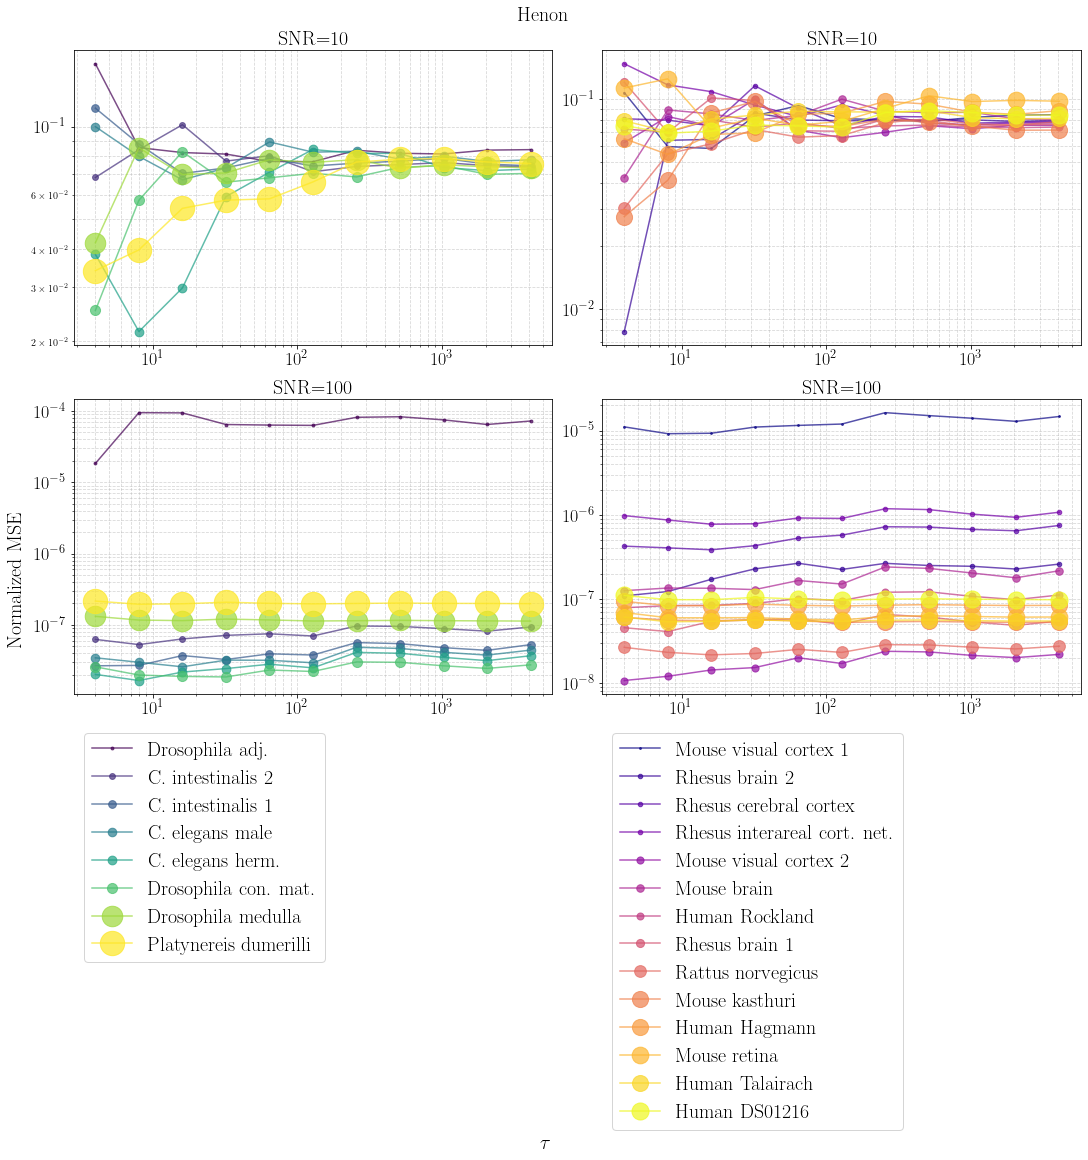

In [8]:
#for s in range(len(signals)):
plot_comparison('IkedaX', 'Ikeda', connectomes_info, network_names, network_names_pro_mean, 'label_mean')

## 2) Heatmap

In [9]:
# Custom colomap
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack( (top(np.linspace(0, 1, 128)), bottom(np.linspace(0, 1, 128))) )

newcmp = ListedColormap(newcolors, name='OrangeBlue')

In [10]:
def plot_heatmap(signals, signal_names, connectomes_info, network_names, network_names_pro, label):
            
    rows, cols = int(len(signals)/2), 2
    fig, ax = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(16,10), constrained_layout=True) 
    ax_list = []
        
    for n in range(len(signals)):
        
        df     = mean_std_realizations('../results_Emp_processed/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)
        df_ER = mean_std_realizations('../results_ER_processed/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)
        df_CM = mean_std_realizations('../results_CM_processed/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)
        df_SBM = mean_std_realizations('../results_SBM_processed/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)

        df['MSE.norm.mean_ER'] = df_ER['MSE.norm.mean']
        df['MSE.norm.std_ER']  = df_ER['MSE.norm.std']
        
        df['MSE.norm.mean_CM'] = df_CM['MSE.norm.mean']
        df['MSE.norm.std_CM']  = df_CM['MSE.norm.std']
        
        df['MSE.norm.mean_SBM'] = df_SBM['MSE.norm.mean']
        df['MSE.norm.std_SBM']  = df_SBM['MSE.norm.std']
        
        df['ZER'] = ( df['MSE.norm.mean_ER'] - df['MSE.norm.mean'] ) / np.sqrt( np.power(df['MSE.norm.std']/np.sqrt(df['Count']),2) 
                                + np.power(df['MSE.norm.std_ER']/np.sqrt(df['Count']),2) )
        df['ZCM'] = ( df['MSE.norm.mean_CM'] - df['MSE.norm.mean'] ) / np.sqrt( np.power(df['MSE.norm.std']/np.sqrt(df['Count']),2) 
                                + np.power(df['MSE.norm.std_CM']/np.sqrt(df['Count']),2) )
        df['ZSBM'] = ( df['MSE.norm.mean_SBM'] - df['MSE.norm.mean'] ) / np.sqrt( np.power(df['MSE.norm.std']/np.sqrt(df['Count']),2) 
                                + np.power(df['MSE.norm.std_SBM']/np.sqrt(df['Count']),2) )
        
        
                
        df_c =   df[df['tau'] == 4096]
        df_snr = df_c[df_c['SNR'] == 100].sort_values(by=['N tot spec'])
        df_snr = df_snr.drop(columns=['tau','SNR',
                                      'MSE.norm.mean','MSE.norm.std',
                                      'MSE.norm.mean_ER','MSE.norm.std_ER',
                                      'MSE.norm.mean_CM','MSE.norm.std_CM',
                                      'MSE.norm.mean_SBM','MSE.norm.std_SBM',
                                      'N', 'N tot spec', 'E.orig', 'E', 'lcc.frac.orig', 'apl.unw', 'apl',
                                      'k.mean', 'density', 'globclu.unw', 'mod.unw', 'clu.mean',
                                      'clu.unw.mean', 'Modularity', 'Heterogeneity', 'Gini', 'Count'])
        
        df_snr['ZER'] = np.where(df_snr['ZER'].between(-1.96,1.96), np.nan, df_snr['ZER'])
        df_snr['ZCM'] = np.where(df_snr['ZCM'].between(-1.96,1.96), np.nan, df_snr['ZCM'])
        df_snr['ZSBM'] = np.where(df_snr['ZSBM'].between(-1.96,1.96), np.nan, df_snr['ZSBM'])
        
        network = list(df_snr['Network'])
        df_snr = df_snr.set_index('Network', drop=True)
        df_snr.index.names = [None]
        
        im = sns.heatmap(df_snr.T, ax=ax[int(np.floor(n/2)),n%2],
                    vmin=-20, vmax=20,
                    cmap=newcmp,
                    robust=False, annot=None,
                    fmt='.2g', annot_kws=None,
                    linewidths=0.5, linecolor='white',
                    cbar=None, cbar_kws=None,
                    cbar_ax=None,
                    square=True,
                    xticklabels='auto', yticklabels='auto',
                    mask=None)  
        
        ax[int(np.floor(n/2)),n%2].set_facecolor('whitesmoke')
        print(signals[n])
        ax[int(np.floor(n/2)),n%2].set_title(signal_names[n],fontsize=22)
        
        ax[int(np.floor(n/2)),n%2].set_xticks([i+0.5 for i in range(len(network))])
        ax[int(np.floor(n/2)),n%2].set_xticklabels(network) #, rotation='60', ha = 'right'
        ax[int(np.floor(n/2)),n%2].set_yticks([i+0.5 for i in range(3)])
        ax[int(np.floor(n/2)),n%2].set_yticklabels(['ER','CM','SBM'], rotation='horizontal')
        ax[int(np.floor(n/2)),n%2].tick_params(left = False, bottom=False, labelsize=22)
        ax_list.append(ax[int(np.floor(n/2)),n%2])
    
    ax[int(np.floor(6/2)),6%2].tick_params(bottom=True)
    ax[int(np.floor(7/2)),7%2].tick_params(bottom=True)
    
    mappable = im.get_children()[0]
    cbar = plt.colorbar(mappable, ax=ax_list,orientation='horizontal', location='top', shrink=0.3)
    cbar.ax.tick_params(labelsize=22)
    
    filename = './plots/' + 'heatmap_Zscore.pdf'
    plt.savefig(filename, bbox_inches='tight')

White
fBrownTurb_H075_D1
HenonX
IkedaX
LorenzX_s50
RosslerX_s20
MackeyGlass_t17
LorenzX_s50_patch_IkedaX


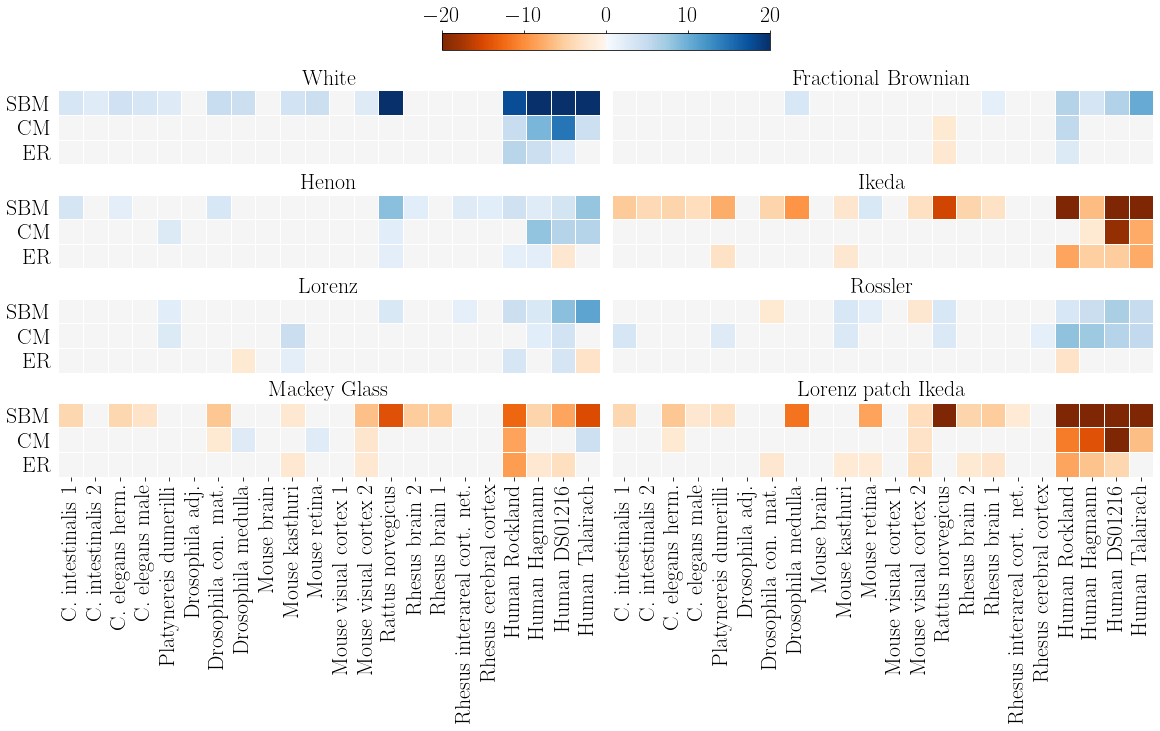

In [11]:
plot_heatmap(signals, signal_names, connectomes_info, network_names, network_names_pro_mean, 'label_mean')

# ---

## Correlations

In [ ]:
def plot_corr(signals, signal_names, ver, key, val, connectomes_info, network_names, network_names_pro, label):
        
    snr = [0, 5, 10, 25, 50, 100]
    
    rows, cols = int(len(signals)/2), 2
    fig, ax = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=(15,10), constrained_layout=True)
        
    for n in range(len(signals)):
        
        df = mean_std_realizations('../results_Emp_processed/' + signals[n] + '.txt', connectomes_info, network_names, network_names_pro, label)
                
        df_c =   df[df['tau'] == 4096]
        df_snr = df_c[df_c['SNR'] == 100].sort_values(by=['N tot spec'])
        
        network = list(df_snr['Network'])
        col = palette.inferno(len(network))[::-1]
        
        corr_data_x = []
        corr_data_y = []
                
        for s in range(len(network)):
            df_sig = df_snr[df_snr['Network'] == network[s]]
            ax[int(np.floor(n/2)),n%2].plot(df_sig[key], df_sig[val], 
                         'o', color = col[s], alpha = 0.7, markersize=8,
                         label = network[s] if n==0 else None)
            
            corr_data_x.append(float(df_sig[key]))
            corr_data_y.append(float(df_sig[val]))
                                    
        a = sp.stats.spearmanr(corr_data_x, corr_data_y, nan_policy='omit')
        alpha = 1.0 / (1.0 + 1.0 / ( -1.0 * np.e * a[1] * np.log(a[1])))
        per = permutation_test(corr_data_x, corr_data_y, 10000)
        
        print(signals[n])
        ax[int(np.floor(n/2)),n%2].set_title(signal_names[n] + '\n' +
                                             'Corr. = '  + str(round(a[0], 4)) + '   ' +
                                             r'P-value $\leq 0.001$' #+ str(round(per, 4)),fontsize=20
                                            )
        print(signal_names[n], str(round(a[0], 4)), str(round(per, 4)))
                                        
        ax[int(np.floor(n/2)),n%2].set_xscale('log')
        ax[int(np.floor(n/2)),n%2].set_yscale('log')
        ax[int(np.floor(n/2)),n%2].tick_params(axis='both', labelsize=18)
        ax[int(np.floor(n/2)),n%2].grid(True, which="both", ls="--", alpha=0.5)
        
    
    fig.legend(bbox_to_anchor=(0.015,0), loc='upper left',fontsize=20,ncol=3)
    #fig.legend(bbox_to_anchor=(1,0.98), loc='upper left',fontsize=20)

    if key == 'N': fig.supxlabel('Num. of nodes',fontsize=20)
    if key == 'k.mean': fig.supxlabel(r'$\langle k \rangle$',fontsize=20)
    if key == 'Modularity': fig.supxlabel('Modularity',fontsize=20)
    fig.supylabel('Normalized MSE',fontsize=20)
    
    filename = './plots/' + ver + '_corr_' + key + '_' + val + '.pdf'
    plt.savefig(filename, bbox_inches='tight')

In [ ]:
### Number of nodes
# 1 o 2 sono solo nomi per distinguere i file con diversi segnali
plot_corr(signals1, signal_names1, '1', 'N', 'MSE.norm.mean', connectomes_info, network_names, network_names_pro_mean, 'label_mean')
plot_corr(signals2, signal_names2, '2', 'N', 'MSE.norm.mean', connectomes_info, network_names, network_names_pro_mean, 'label_mean')

In [ ]:
### Mean degree
plot_corr(signals1, signal_names1, '1', 'k.mean', 'MSE.norm.mean', connectomes_info, network_names, network_names_pro, 'label')
plot_corr(signals2, signal_names2, '2', 'k.mean', 'MSE.norm.mean', connectomes_info, network_names, network_names_pro, 'label')

In [ ]:
### Modularity
plot_corr(signals1, signal_names1, '1', 'Modularity', 'MSE.norm.mean', connectomes_info, network_names, network_names_pro, 'label')
plot_corr(signals2, signal_names2, '2', 'Modularity', 'MSE.norm.mean', connectomes_info, network_names, network_names_pro, 'label')

## Z test

In [ ]:
def plot_Ztest(signals, signal_names, syn_network, connectomes_info, network_names, network_names_pro, label):
        
    snr = [0, 5, 10, 25, 50, 100]
    
    rows, cols = int(len(signals)/2), 2
    fig, ax = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(15,18), constrained_layout=True) 
        
    for n in range(len(signals)):
        
        df     = mean_std_realizations('../results_Emp_processed/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)
        df_CM = mean_std_realizations('../results_CM_processed/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)
        df_ER = mean_std_realizations('../results_ER_processed/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)
        df_SBM = mean_std_realizations('../results_SBM_processed/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)

        df['MSE.norm.mean_CM'] = df_CM['MSE.norm.mean']
        df['MSE.norm.std_CM']  = df_CM['MSE.norm.std']

        df['MSE.norm.mean_ER'] = df_ER['MSE.norm.mean']
        df['MSE.norm.std_ER']  = df_ER['MSE.norm.std']
        
        df['MSE.norm.mean_SBM'] = df_SBM['MSE.norm.mean']
        df['MSE.norm.std_SBM']  = df_SBM['MSE.norm.std']
        
        

        df['Z_CM'] = ( df['MSE.norm.mean_CM'] - df['MSE.norm.mean'] ) / np.sqrt( np.power(df['MSE.norm.std']/np.sqrt(df['Count']),2) 
                                + np.power(df['MSE.norm.std_CM']/np.sqrt(df['Count']),2) )
        df['Z_ER'] = ( df['MSE.norm.mean_ER'] - df['MSE.norm.mean'] ) / np.sqrt( np.power(df['MSE.norm.std']/np.sqrt(df['Count']),2) 
                                + np.power(df['MSE.norm.std_ER']/np.sqrt(df['Count']),2) )
        df['Z_SBM'] = ( df['MSE.norm.mean_SBM'] - df['MSE.norm.mean'] ) / np.sqrt( np.power(df['MSE.norm.std']/np.sqrt(df['Count']),2) 
                                + np.power(df['MSE.norm.std_SBM']/np.sqrt(df['Count']),2) )
        
        df_c =   df[df['tau'] == 4096]
        df_snr = df_c[df_c['SNR'] == 100].sort_values(by=['N tot spec'])
        
        network = list(df_snr['Network'])
        col = palette.inferno(len(network))[::-1]
                       
        for s in range(len(network)):
            df_sig = df_snr[df_snr['Network'] == network[s]]
            ax[int(np.floor(n/2)),n%2].plot(s, df_sig['Z_' + syn_network], 
                         'o', color = col[s], alpha = 0.7, markersize=8,
                         label = network[s] if n==0 else None)                                   
        
        print(signals[n])
        ax[int(np.floor(n/2)),n%2].set_title(signal_names[n],fontsize=20)
        ax[int(np.floor(n/2)),n%2].set_yscale('symlog') 
        ax[int(np.floor(n/2)),n%2].set_ylim(-50,50)
        ax[int(np.floor(n/2)),n%2].axhline(y=2, color='r', linestyle='--')
        ax[int(np.floor(n/2)),n%2].axhline(y=-2, color='r', linestyle='--')
        ax[int(np.floor(n/2)),n%2].grid(True, which="both", ls="--", alpha=0.5)
        ax[int(np.floor(n/2)),n%2].set_xticks(range(len(network)))
        ax[int(np.floor(n/2)),n%2].set_xticklabels(network, rotation='60', ha = 'right')
        ax[int(np.floor(n/2)),n%2].tick_params(axis='both', labelsize=18)
        
    #fig.legend(bbox_to_anchor=(1,0.99), loc='upper left')
    fig.supylabel('Z score',fontsize=20)
    
    filename = './plots/' + 'Ztest_' + syn_network + '.pdf'
    fig.tight_layout()
    plt.savefig(filename, bbox_inches='tight')

In [ ]:
#plot_Ztest(signals, signal_names, 'CM', connectomes_info, network_names, network_names_pro_mean, 'label_mean')

In [ ]:
#plot_Ztest(signals, signal_names, 'ER', connectomes_info, network_names, network_names_pro_mean, 'label_mean')

In [ ]:
#plot_Ztest(signals, signal_names, 'SBM', connectomes_info, network_names, network_names_pro_mean, 'label_mean')

## Z test error

In [ ]:
def plot_corr(signals, signal_names, syn_network, connectomes_info, network_names, network_names_pro, label):
        
    snr = [0, 5, 10, 25, 50, 100]
    
    rows, cols = int(len(signals)/2), 2
    fig, ax = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(15,18), constrained_layout=True) 
        
    for n in range(len(signals)):
        
        df_syn = mean_std_realizations('../results_' + syn_network + '_processed/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)
        df     = mean_std_realizations('../results_Emp_processed/' + signals[n] + '.txt', 
                                    connectomes_info, network_names, network_names_pro, label)

        df['MSE.norm.mean_syn'] = df_syn['MSE.norm.mean']
        df['MSE.norm.std_syn']  = df_syn['MSE.norm.std']

        df['Z'] = ( df['MSE.norm.mean_syn'] - df['MSE.norm.mean'] ) / np.sqrt( np.power(df['MSE.norm.std']/np.sqrt(df['Count']),2) 
                                + np.power(df['MSE.norm.std_syn']/np.sqrt(df['Count']),2) )
        
        df_mean = df.groupby(['Network','SNR']).mean().reset_index()
        df_mean = df_mean.drop(columns=['tau'])
        df_mean = df_mean.rename(columns = {'Z':'Z.mean'})

        df_std = df.groupby(['Network','SNR']).std().reset_index()
        df_std = df_std.rename(columns = {'Z':'Z.std'})
        df_mean['Z.std'] = df_std['Z.std']
        
        # Log error
        df_mean['Z.mean.log'] = np.sign(df_mean['Z.mean']) * np.log(np.abs(df_mean['Z.mean']))
        df_mean['Z.std.log'] = 0.434 * df_mean['Z.std'] / df_mean['Z.mean']
        
        df_snr = df_mean[df_mean['SNR'] == 100].sort_values(by=['N tot spec'])
        
        network = list(df_snr['Network'])
        col = palette.inferno(len(network))[::-1]
                       
        for s in range(len(network)):
            df_sig = df_snr[df_snr['Network'] == network[s]]
            ax[int(np.floor(n/2)),n%2].errorbar(s, df_sig['Z.mean.log'], df_sig['Z.std.log'],fmt='-o',
                         color = col[s], alpha = 1.0, markersize=8,
                         label = network[s] if n==0 else None)                                   
        
        print(signals[n])
        ax[int(np.floor(n/2)),n%2].set_title(signal_names[n],fontsize=20)
        #ax[int(np.floor(n/2)),n%2].set_yscale('symlog') 
        ax[int(np.floor(n/2)),n%2].set_ylim(-10,10)
        ax[int(np.floor(n/2)),n%2].axhline(y=2, color='r', linestyle='--')
        ax[int(np.floor(n/2)),n%2].axhline(y=-2, color='r', linestyle='--')
        ax[int(np.floor(n/2)),n%2].grid(True, which="both", ls="--", alpha=0.5)
        ax[int(np.floor(n/2)),n%2].set_xticks(range(len(network)))
        ax[int(np.floor(n/2)),n%2].set_xticklabels(network, rotation='60', ha = 'right')
        ax[int(np.floor(n/2)),n%2].tick_params(axis='both', labelsize=18)
        
    #fig.legend(bbox_to_anchor=(1,0.99), loc='upper left')

    fig.supylabel('log. Z score',fontsize=20)
    
    filename = './plots/' + 'Ztest_' + syn_network + '_error.pdf'
    fig.tight_layout()
    plt.savefig(filename, bbox_inches='tight')

In [ ]:
plot_corr(signals, signal_names, 'CM', connectomes_info, network_names, network_names_pro_mean, 'label_mean')

In [ ]:
plot_corr(signals, signal_names, 'ER', connectomes_info, network_names, network_names_pro_mean, 'label_mean')

In [ ]:
plot_corr(signals, signal_names, 'SBM', connectomes_info, network_names, network_names_pro_mean, 'label_mean')

### Mutual Info

In [ ]:
N = [279,
269,
222,
138,
1770,
365,
49,
1121,
959,
1156,
984,
1144,
964,
1121,
972,
1128,
967,
188,
188,
188,
188,
188,
188,
188,
188,
188,
188,
998,
994,
992,
994,
988,
987,
213,
1076,
29,
193,
2728,
503,
502,
493,
242,
91,
91,
93]

In [ ]:
Ntot = [302,
302,
213,
213,
100000,
100000,
100000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
100000000000,
71000000,
71000000,
71000000,
71000000,
71000000,
2728,
200000000,
200000000,
200000000,
6376000000,
6376000000,
6376000000,
6376000000]


In [ ]:
MI = [0.367681,
0.390522,
0.296621,
0.233830,
0.122093,
0.532040,
0.472630,
0.530254,
0.239862,
1.000000,
0.544595,
0.471482,
0.520253,
0.474827,
0.528639,
0.437950,
0.458497,
0.297715,
0.382307,
0.313650,
0.346905,
0.377941,
0.378333,
0.363255,
0.308171,
0.337402,
0.407345,
0.683204,
0.689865,
0.681007,
0.658379,
0.686145,
0.049382,
0.053427,
0.442005,
0.005190,
0.072764,
0.177831,
0.159089,
0.140331,
0.167009,
0.428885,
0.065346,
0.061580,
0.000004]

In [ ]:
error = [2.616465e-02,
2.129730e-02,
1.267454e-02,
2.445775e-02,
8.951570e-03,
6.131543e-03,
6.276633e-03,
4.702867e-03,
7.936272e-03,
0.000000e+00,
6.101630e-03,
7.215498e-03,
5.968237e-03,
5.470483e-03,
8.735762e-03,
8.678324e-03,
1.129030e-02,
1.337127e-02,
1.153693e-02,
1.255477e-02,
1.509501e-02,
1.474464e-02,
1.215753e-02,
2.255089e-02,
2.130208e-02,
1.929569e-02,
1.904330e-02,
6.520766e-03,
5.784078e-03,
5.986711e-03,
4.386177e-03,
5.163439e-03,
1.105029e-02,
1.273863e-02,
1.201612e-02,
1.617903e-02,
8.551040e-03,
1.134709e-02,
1.500132e-02,
9.918795e-03,
8.312538e-03,
1.640741e-02,
2.795749e-04,
9.737461e-03,
8.690375e-22]

In [ ]:
d = {'Networks': network_names_pro,
     'MI':       MI,
     'error':    error,
     'N': N,
     'Ntot': Ntot}

In [ ]:
df = pd.DataFrame(d)

In [ ]:
df = df.sort_values(by=['Ntot'])

In [ ]:
df

In [ ]:
rows, cols = 1, 1
fig, ax = plt.subplots(rows, cols, sharex=False, sharey=False, figsize=(12,8), constrained_layout=True) 

plt.bar(df['Networks'], df['MI'], yerr=df['error'])
ax.set_xticks(range(len(network_names_pro)))
ax.set_xticklabels(df['Networks'], rotation='60', ha = 'right')
ax.set_axisbelow(True)
ax.yaxis.grid(True, which="both", ls="--", alpha=0.5)
ax.tick_params(axis='both', labelsize=18)
ax.set_ylabel('Normalized Mutual Information',fontsize=20)
filename = './plots/' + 'MI.pdf'
fig.tight_layout()
plt.savefig(filename, bbox_inches='tight')